# Question 5

In [1]:
import igraph as ig
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from collections import Counter

In [2]:
##Below code was taken from our lab

In [3]:
## fast Chung-Lu: generate m edges w.r.t. distribution d
def fastCL(d, m):
    n = len(d)
    s = np.sum(d)
    p = [i/s for i in d]
    target = m
    tples = []
    ## generate edges (tuples), drop collisions, until m edges are obtained.
    while len(tples) < target:
        s = target - len(tples)
        e0 = np.random.choice(n, size=s, replace=True, p=p)
        e1 = np.random.choice(n, size=s, replace=True, p=p)
        tples.extend([(min(e0[i],e1[i]),max(e0[i],e1[i])) for i in range(len(e0)) if e0[i]!=e1[i]]) ## ignore loops
        tples = list(set(tples)) ## drop collisions
    return tples

In [4]:
## for a fixed l -- can be slow for multiple l's
def rich_club(g, l=1):
    g.vs()['degree'] = g.degree()
    l_max = np.max(g.degree())
    c = Counter(g.degree())
    n = g.vcount()
    moment = np.sum([k*c[k]/n for k in c])**2
    S = [k*c[k]/n for k in c if k>=l]
    phi_hat = np.sum([x*y for x in S for y in S])*g.ecount()/moment
    G = g.subgraph([v for v in g.vs() if v['degree']>=l])
    phi = G.ecount()
    return phi/phi_hat

## First Graph with gamma 2.1

In [5]:
## First Graph with gamma 2.1
## power law graph
#gamma = [2.1,2.5,2.9]
gamma = 2.1
n = 10000
## min and max degrees
delta = 1
Delta = np.sqrt(n)
## generate degrees
W = []

for i in np.arange(1,n+1):
    W.append(delta * (n/(i-1+n/(Delta/delta)**(gamma-1)))**(1/(gamma-1)))

# deg = [int(np.round(w)) for w in W] ## to enforce integer weights, not an obligation
deg= W
#print(len(deg))

## generate graph with Chung-Lu model
m = int(np.mean(deg)*n/2)
tpl = fastCL(deg,m)
g1 = ig.Graph.TupleList(tpl)



r = -0.004702572184320356


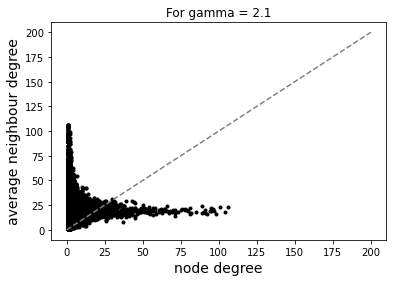

In [6]:
## plot degree vs avg neighbour degree
## friendship 'paradox' 
deg = [v.degree() for v in g1.vs()]
nad = []
for v in g1.vs():
    nv = g1.neighbors(v)
    nad.append(np.mean([deg[i] for i in nv]))

plt.scatter(deg,nad,c='black',marker='.')
plt.title("For gamma = 2.1")

plt.xlabel('node degree', fontsize=14)
plt.ylabel('average neighbour degree', fontsize=14);
plt.plot([0,200],[0,200],'--', c='gray')
print('r =',g1.assortativity_degree());
#plt.savefig('friendship.eps')

r = -0.004702572184320356


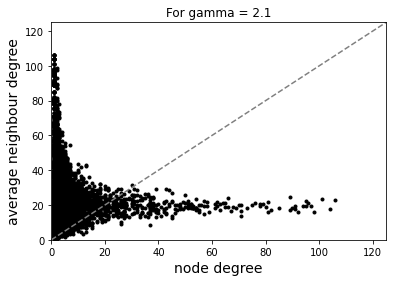

In [7]:
#same graph, zooming in

deg = [v.degree() for v in g1.vs()]
nad = []
for v in g1.vs():
    nv = g1.neighbors(v)
    nad.append(np.mean([deg[i] for i in nv]))

plt.scatter(deg,nad,c='black',marker='.')
plt.title("For gamma = 2.1")
plt.xlim((0,125))
plt.ylim((0,125))
plt.xlabel('node degree', fontsize=14)
plt.ylabel('average neighbour degree', fontsize=14);
plt.plot([0,200],[0,200],'--', c='gray')
print('r =',g1.assortativity_degree());
#plt.savefig('friendship.eps')

In [8]:
print("There seems to be more points above the dotted line; this would support friendship paradox")


There seems to be more points above the dotted line; this would support friendship paradox


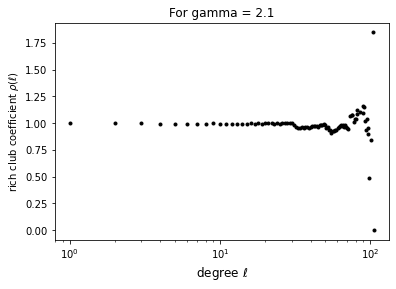

In [9]:

d = list(set(g1.degree()))
rc = []
for i in d:
    rc.append(rich_club(g1, l=i))
plt.semilogx(d,rc,'.',c='black')
plt.title("For gamma = 2.1")
plt.xlabel(r'degree $\ell$',fontsize=12)
plt.ylabel(r'rich club coefficient $\rho(\ell)$');
#plt.savefig('rich_club.eps');

In [10]:
print("Given p(l) > 1 for large degrees of l, there is evidence for rich club behaviour")

Given p(l) > 1 for large degrees of l, there is evidence for rich club behaviour


## second random Graph with gamma 2.5

In [11]:
## second random Graph with gamma 2.5
## power law graph

gamma = 2.5
n = 10000

## min and max degrees
delta = 1
Delta = np.sqrt(n)

## generate degrees
W = []

for i in np.arange(1,n+1):
    W.append(delta * (n/(i-1+n/(Delta/delta)**(gamma-1)))**(1/(gamma-1)))

# deg = [int(np.round(w)) for w in W] ## to enforce integer weights, not an obligation
deg = W
#print(len(deg))

## generate graph with Chung-Lu model
m = int(np.mean(deg)*n/2)
tpl = fastCL(deg,m)
g2 = ig.Graph.TupleList(tpl)


r = -0.0035269118440224953


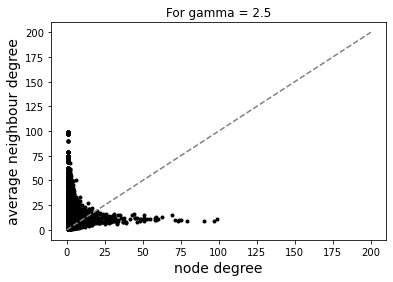

In [12]:
## plot degree vs avg neighbour degree
## friendship 'paradox' 
deg = [v.degree() for v in g2.vs()]
nad = []
for v in g2.vs():
    nv = g2.neighbors(v)
    nad.append(np.mean([deg[i] for i in nv]))

plt.scatter(deg,nad,c='black',marker='.')
plt.title("For gamma = 2.5")
#plt.xlim((0,200))
#plt.ylim((0,200))
plt.xlabel('node degree', fontsize=14)
plt.ylabel('average neighbour degree', fontsize=14);
plt.plot([0,200],[0,200],'--', c='gray')
print('r =',g2.assortativity_degree());
#plt.savefig('friendship.eps')

r = -0.0035269118440224953


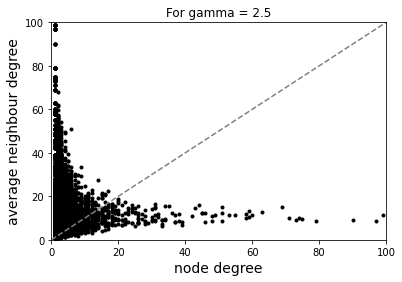

In [13]:
#same graph, zooming in

deg = [v.degree() for v in g2.vs()]
nad = []
for v in g2.vs():
    nv = g2.neighbors(v)
    nad.append(np.mean([deg[i] for i in nv]))

plt.scatter(deg,nad,c='black',marker='.')
plt.title("For gamma = 2.5")
plt.xlim((0,100))
plt.ylim((0,100))
plt.xlabel('node degree', fontsize=14)
plt.ylabel('average neighbour degree', fontsize=14);
plt.plot([0,200],[0,200],'--', c='gray')
print('r =',g2.assortativity_degree());
#plt.savefig('friendship.eps')

In [14]:
print("There seems to be more points above the dotted line; this would support friendship paradox")

There seems to be more points above the dotted line; this would support friendship paradox


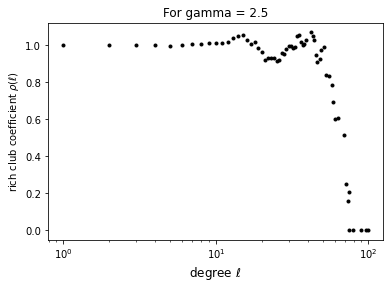

In [15]:
d = list(set(g2.degree()))
rc = []
for i in d:
    rc.append(rich_club(g2, l=i))
plt.semilogx(d,rc,'.',c='black')
plt.title("For gamma = 2.5")
plt.xlabel(r'degree $\ell$',fontsize=12)
plt.ylabel(r'rich club coefficient $\rho(\ell)$');
#plt.savefig('rich_club.eps');

In [23]:
print("Given p(l) > 1 for large degrees of l, there is evidence for rich club behaviour")

Given p(l) > 1 for large degrees of l, there is evidence for rich club behaviour


## Third Graph with gamma 2.9

In [17]:
## 3rd Graph with gamma 2.9
## power law graph
#gamma = [2.1,2.5,2.9]
gamma = 2.9
n = 10000

## min and max degrees
delta = 1
Delta = np.sqrt(n)

## generate degrees
W = []

for i in np.arange(1,n+1):
    W.append(delta * (n/(i-1+n/(Delta/delta)**(gamma-1)))**(1/(gamma-1)))

# deg = [int(np.round(w)) for w in W] ## to enforce integer weights, not an obligation
deg = W
#print(len(deg))

## generate graph with Chung-Lu model
m = int(np.mean(deg)*n/2)
tpl = fastCL(deg,m)
g3 = ig.Graph.TupleList(tpl)


r = -0.01390302208647669


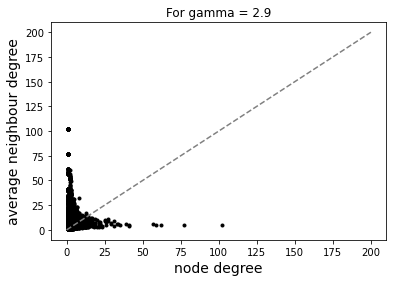

In [18]:
## plot degree vs avg neighbour degree
## friendship 'paradox' 
deg = [v.degree() for v in g3.vs()]
nad = []
for v in g3.vs():
    nv = g3.neighbors(v)
    nad.append(np.mean([deg[i] for i in nv]))

plt.scatter(deg,nad,c='black',marker='.')
plt.title("For gamma = 2.9")

plt.xlabel('node degree', fontsize=14)
plt.ylabel('average neighbour degree', fontsize=14);
plt.plot([0,200],[0,200],'--', c='gray')
print('r =',g3.assortativity_degree())

r = -0.01390302208647669


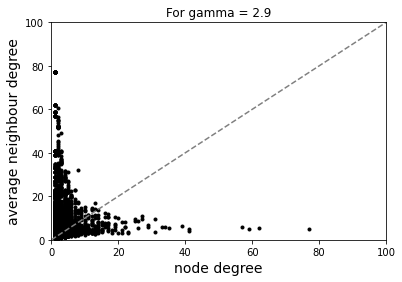

In [19]:
#same graph, zooming in

deg = [v.degree() for v in g3.vs()]
nad = []
for v in g3.vs():
    nv = g3.neighbors(v)
    nad.append(np.mean([deg[i] for i in nv]))

plt.scatter(deg,nad,c='black',marker='.')
plt.title("For gamma = 2.9")
plt.xlim((0,100))
plt.ylim((0,100))
plt.xlabel('node degree', fontsize=14)
plt.ylabel('average neighbour degree', fontsize=14);
plt.plot([0,200],[0,200],'--', c='gray')
print('r =',g3.assortativity_degree())

In [20]:
print("There seems to be more points above the dotted line; this would support friendship paradox")

There seems to be more points above the dotted line; this would support friendship paradox


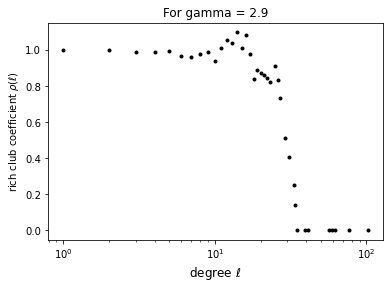

In [21]:
d = list(set(g3.degree()))
rc = []
for i in d:
    rc.append(rich_club(g3, l=i))
plt.semilogx(d,rc,'.',c='black')
plt.title("For gamma = 2.9")
plt.xlabel(r'degree $\ell$',fontsize=12)
plt.ylabel(r'rich club coefficient $\rho(\ell)$');
#plt.savefig('rich_club.eps');

In [22]:
print("Given p(l) > 1 for large degrees of l, there is evidence for rich club behaviour")

Given p(l) > 1 for large degrees of l, there is evidence for rich club behaviour
